In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes

In [2]:
df_clus = pd.read_csv(r'C:\Users\iahma\OneDrive\Desktop\clustering_data.csv')

In [3]:
df_clus.dtypes
df_clus.drop(['ID'], axis=1, inplace = True)

In [4]:
# Initialize strandard scaler and splt dataframe into categorical and numarical data
pcascaler = StandardScaler()
data_scale = df_clus.loc[:, df_clus.dtypes != 'object']
data_cate = df_clus.loc[:, df_clus.dtypes == 'object']

In [5]:
x = data_scale.dtypes
print(x)

Income                 float64
Kidhome                  int64
Teenhome                 int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
days_of_enrollment     float64
age                      int64
dtype: object


In [6]:
x = data_cate.dtypes
print(x)

Education         object
Marital_Status    object
Dt_Customer       object
AcceptedCmp3      object
AcceptedCmp4      object
AcceptedCmp5      object
AcceptedCmp1      object
AcceptedCmp2      object
Complain          object
Response          object
dtype: object


In [7]:
# Standardize the scaler variables and create the princple components

to_pca = pd.DataFrame(pcascaler.fit_transform(data_scale),columns=data_scale.columns)
pca = PCA(svd_solver = 'full')
pca.fit(to_pca)

PCA(svd_solver='full')

In [8]:
# Display explained variance with PCA and it's cumulative ratio
evar = np.round(pca.explained_variance_ratio_,5) 
evar_cum = evar.cumsum()
print(evar_cum)

[0.40346 0.53492 0.62488 0.67796 0.72907 0.7706  0.80717 0.84133 0.86798
 0.89433 0.91878 0.94197 0.96051 0.97718 0.99105 1.     ]


[0.40346 0.53492 0.62488 0.67796 0.72907 0.7706  0.80717 0.84133 0.86798
 0.89433 0.91878 0.94197 0.96051 0.97718 0.99105 1.     ]


Text(0, 0.5, 'Percentage Explained Variance')

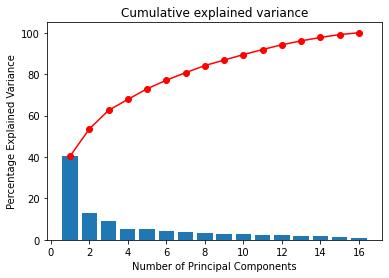

In [9]:
#Plot the cumulative expalined variance
#to identify the suitable number of components for inclusion in clustering

exp_var_rat100 = pca.explained_variance_ratio_*100
print(evar_cum)
plt.bar(np.arange(len(exp_var_rat100))+1, exp_var_rat100)
plt.plot(np.arange(len(exp_var_rat100))+1, exp_var_rat100.cumsum(),c="red",marker='o')
plt.title("Cumulative explained variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Percentage Explained Variance")

In [10]:
# Find only 7 principle components and display the loadings

pca_reduced = PCA(n_components = 7, svd_solver = 'full')
pca_reduced.fit(to_pca)
loadings = pd.DataFrame(pca_reduced.components_.T, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'], index=to_pca.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Income,0.338414,0.017957,-0.186995,0.057384,0.173230,-0.117843,0.069215
Kidhome,-0.262963,-0.020199,0.213237,0.405040,0.018278,-0.309184,0.499309
Teenhome,-0.043238,0.467506,-0.389251,0.191293,-0.169231,-0.014948,-0.371849
MntWines,0.301597,0.176231,-0.006918,-0.201226,0.395020,-0.078472,0.183441
MntFruits,0.277806,-0.114459,0.155735,0.226524,-0.306519,-0.107876,-0.194175
MntMeatProducts,0.320413,-0.132413,0.085714,-0.059305,0.069298,-0.221564,0.249713
MntFishProducts,0.287478,-0.122747,0.151835,0.167112,-0.339198,-0.055768,0.035059
MntSweetProducts,0.278933,-0.098889,0.149259,0.212828,-0.286074,-0.238424,-0.248904
MntGoldProds,0.232517,0.119739,0.181512,0.101985,-0.227229,0.814859,0.246183
NumDealsPurchases,-0.053345,0.523581,0.172016,0.450747,0.016087,-0.121171,0.160619


In [11]:
# Display only the loadings that are greater than 0.3
loadings[(loadings>0.3)|(loadings<-0.3)]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Income,0.338414,NaN,NaN,NaN,NaN,NaN,NaN
Kidhome,NaN,NaN,NaN,0.405040,NaN,-0.309184,0.499309
Teenhome,NaN,0.467506,-0.389251,NaN,NaN,NaN,-0.371849
MntWines,0.301597,NaN,NaN,NaN,0.395020,NaN,NaN
MntFruits,NaN,NaN,NaN,NaN,-0.306519,NaN,NaN
MntMeatProducts,0.320413,NaN,NaN,NaN,NaN,NaN,NaN
MntFishProducts,NaN,NaN,NaN,NaN,-0.339198,NaN,NaN
MntSweetProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntGoldProds,NaN,NaN,NaN,NaN,NaN,0.814859,NaN
NumDealsPurchases,NaN,0.523581,NaN,0.450747,NaN,NaN,NaN


In [12]:
# Add principle components to the categorical data for clustering

scale_red = pd.DataFrame(pca_reduced.transform(to_pca), columns = ['Wealthiness','Thriftiness','Recently joined users','Young users','General purchasing habits','Gold purchasing behavior','Familial age'])
clustering_final= pd.concat([scale_red.reset_index(drop = True), data_cate.reset_index(drop = True)], axis=1)

In [13]:
clustering_final.dtypes

Wealthiness                  float64
Thriftiness                  float64
Recently joined users        float64
Young users                  float64
General purchasing habits    float64
Gold purchasing behavior     float64
Familial age                 float64
Education                     object
Marital_Status                object
Dt_Customer                   object
AcceptedCmp3                  object
AcceptedCmp4                  object
AcceptedCmp5                  object
AcceptedCmp1                  object
AcceptedCmp2                  object
Complain                      object
Response                      object
dtype: object

In [14]:
# Create multiple clustering numbers and compute cost to identify suitable
# number of clusters


cat_forclustring = [clustering_final.columns.get_loc(i) for i in clustering_final.loc[:, clustering_final.dtypes == 'object'].columns]
cost = []

for i in range(2,7):
    clust = KPrototypes(n_clusters = i,init='Huang',random_state=42)
    clust.fit_predict(clustering_final,categorical = cat_forclustring)
    cost.append(clust.cost_)

Text(0.5, 1.0, 'Cost Vs. # of clusters')

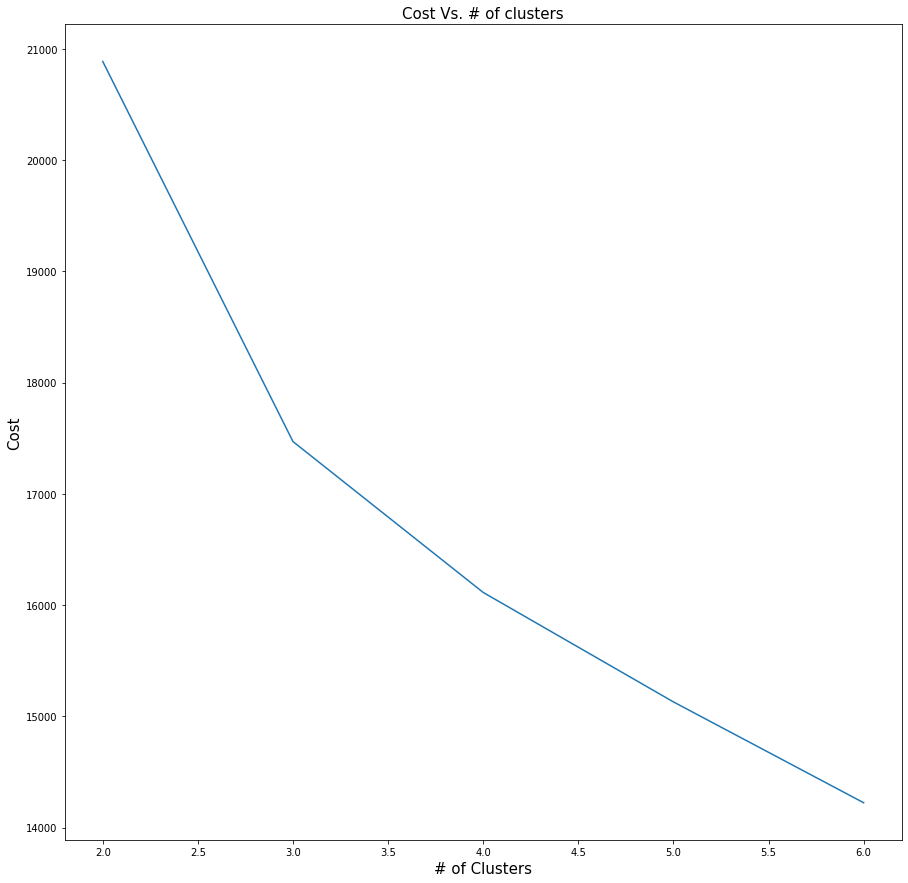

In [30]:
# Plot cost vs number of clusters

fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (15,15))
ax1.plot(range(2,7),cost)
ax1.set_xlabel('# of Clusters', fontsize=15)
ax1.set_ylabel('Cost', fontsize=15)
ax1.set_title('Cost Vs. # of clusters', fontsize=15)

In [15]:
# final clustering with 3 clusters only and add clusters to original data

clust = KPrototypes(n_clusters = 3,init='Huang',random_state=42)
clust.fit_predict(clustering_final,categorical = cat_forclustring)
Clusterd_data = clustering_final.loc[:]
Clusterd_data['Clusters'] = clust.labels_
df_clus['Clusters'] = clust.labels_
Clusterd_data.Clusters.value_counts()

0    1021
2     617
1     590
Name: Clusters, dtype: int64

In [16]:
Clusterd_data.head(10)

,Wealthiness,Thriftiness,Recently joined users,Young users,General purchasing habits,Gold purchasing behavior,Familial age,Education,Marital_Status,Dt_Customer,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Clusters
0,3.988469,0.600968,1.982427,-0.806423,-1.675989,-0.574663,1.260574,Graduation,Single,2012-09-04,No,No,No,No,No,No,Yes,1
1,-2.350471,-0.305810,-1.967486,0.521352,-0.735221,-0.323103,0.746185,Graduation,Single,2014-03-08,No,No,No,No,No,No,No,0
2,1.973894,-0.261013,-0.198711,-0.240453,0.406132,0.093201,-0.429762,Graduation,Together,2013-08-21,No,No,No,No,No,No,No,1
3,-2.616297,-1.489246,0.507313,0.772320,0.768485,0.125076,-0.035584,Graduation,Together,2014-02-10,No,No,No,No,No,No,No,0
4,-0.287535,-0.309228,0.802003,1.891711,0.908888,-0.553293,0.409931,PhD,Married,2014-01-19,No,No,No,No,No,No,No,0
5,0.988465,0.979573,-0.876101,-0.125707,0.816295,-0.345423,-1.151775,Master,Together,2013-09-09,No,No,No,No,No,No,No,2
6,0.916986,1.503622,0.674913,0.043177,-0.509443,-0.577300,-1.353144,Graduation,Divorced,2012-11-13,No,No,No,No,No,No,No,2
7,-2.306449,-0.522745,1.598475,-0.049350,0.704971,0.090448,-0.090602,PhD,Married,2013-05-08,No,No,No,No,No,No,No,0
8,-2.903822,-0.761563,0.982365,-0.611915,0.076960,-0.188001,0.279786,PhD,Together,2013-06-06,No,No,No,No,No,No,Yes,0
9,-4.803214,1.225246,0.248410,-0.697174,-1.457755,0.206247,0.875497,PhD,Together,2014-03-13,Yes,No,No,No,No,No,No,0


Text(0.5, 1.0, 'Gold purchasing behavior of each cluster')

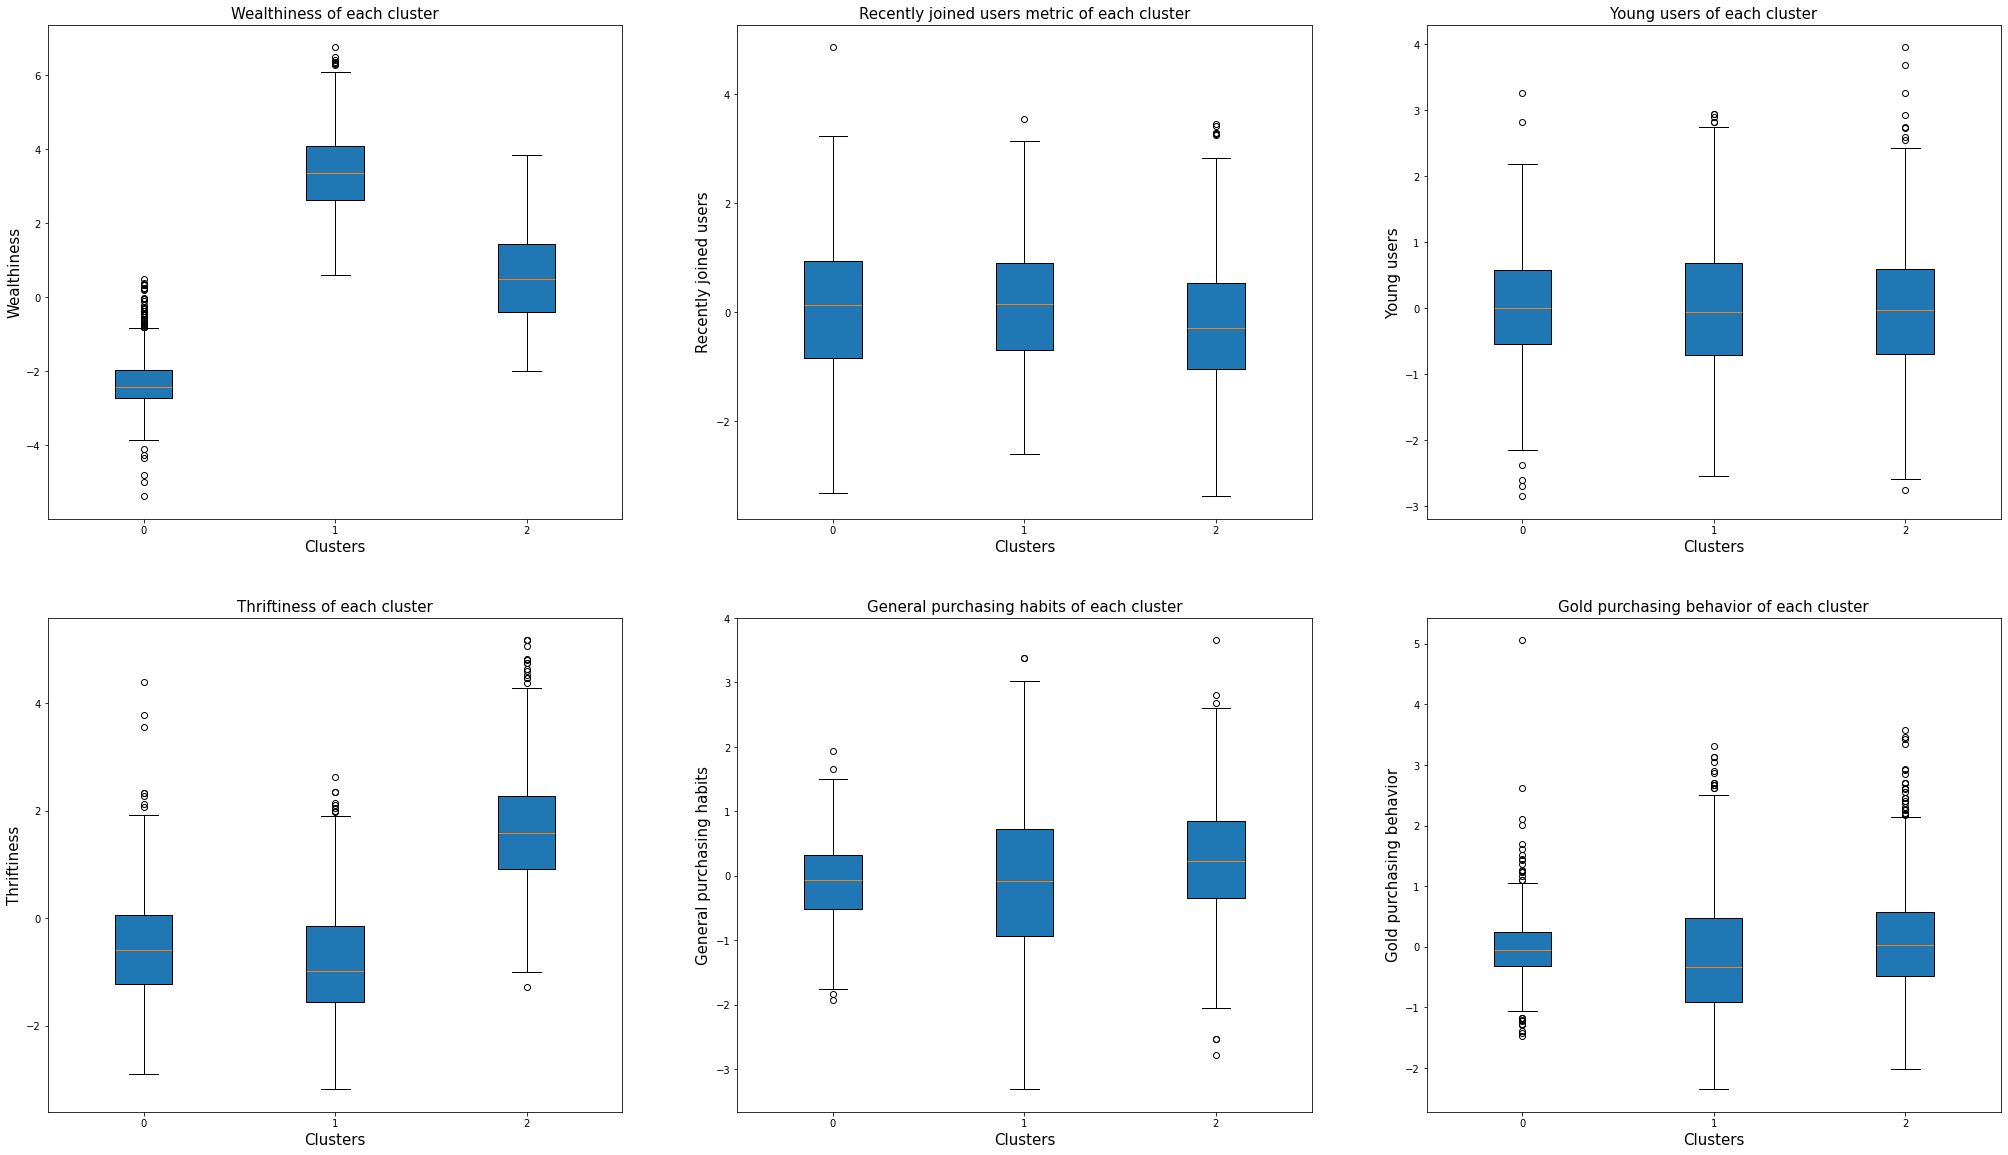

In [17]:
#Plot the clusters vs the principle components 

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (35,20))
temp1 = Clusterd_data.groupby(['Clusters'])['Wealthiness'].apply(list)
bplot = axs[0,0].boxplot(temp1, labels = temp1.index,
                     vert=True,
                     patch_artist=True)
axs[0,0].set_xlabel('Clusters', fontsize=15)
axs[0,0].set_ylabel('Wealthiness', fontsize=15)
axs[0,0].set_title('Wealthiness of each cluster', fontsize=15)

temp2 = Clusterd_data.groupby(['Clusters'])['Thriftiness'].apply(list)
bplot = axs[1,0].boxplot(temp2, labels = temp2.index,
                     vert=True,
                     patch_artist=True)
axs[1,0].set_xlabel('Clusters', fontsize=15)
axs[1,0].set_ylabel('Thriftiness', fontsize=15)
axs[1,0].set_title('Thriftiness of each cluster', fontsize=15)

temp3 = Clusterd_data.groupby(['Clusters'])['Recently joined users'].apply(list)
bplot = axs[0,1].boxplot(temp3, labels = temp3.index,
                     vert=True,
                     patch_artist=True)
axs[0,1].set_xlabel('Clusters', fontsize=15)
axs[0,1].set_ylabel('Recently joined users', fontsize=15)
axs[0,1].set_title('Recently joined users metric of each cluster', fontsize=15)

temp4 = Clusterd_data.groupby(['Clusters'])['Young users'].apply(list)
bplot = axs[0,2].boxplot(temp4, labels = temp4.index,
                     vert=True,
                     patch_artist=True)
axs[0,2].set_xlabel('Clusters', fontsize=15)
axs[0,2].set_ylabel('Young users', fontsize=15)
axs[0,2].set_title('Young users of each cluster', fontsize=15)

temp5 = Clusterd_data.groupby(['Clusters'])['General purchasing habits'].apply(list)
bplot = axs[1,1].boxplot(temp5, labels = temp5.index,
                     vert=True,
                     patch_artist=True)
axs[1,1].set_xlabel('Clusters', fontsize=15)
axs[1,1].set_ylabel('General purchasing habits', fontsize=15)
axs[1,1].set_title('General purchasing habits of each cluster', fontsize=15)

temp6 = Clusterd_data.groupby(['Clusters'])['Gold purchasing behavior'].apply(list)
bplot = axs[1,2].boxplot(temp6, labels = temp6.index,
                     vert=True,
                     patch_artist=True)
axs[1,2].set_xlabel('Clusters', fontsize=15)
axs[1,2].set_ylabel('Gold purchasing behavior', fontsize=15)
axs[1,2].set_title('Gold purchasing behavior of each cluster', fontsize=15)



Text(0.5, 1.0, 'Familial age of each cluster')

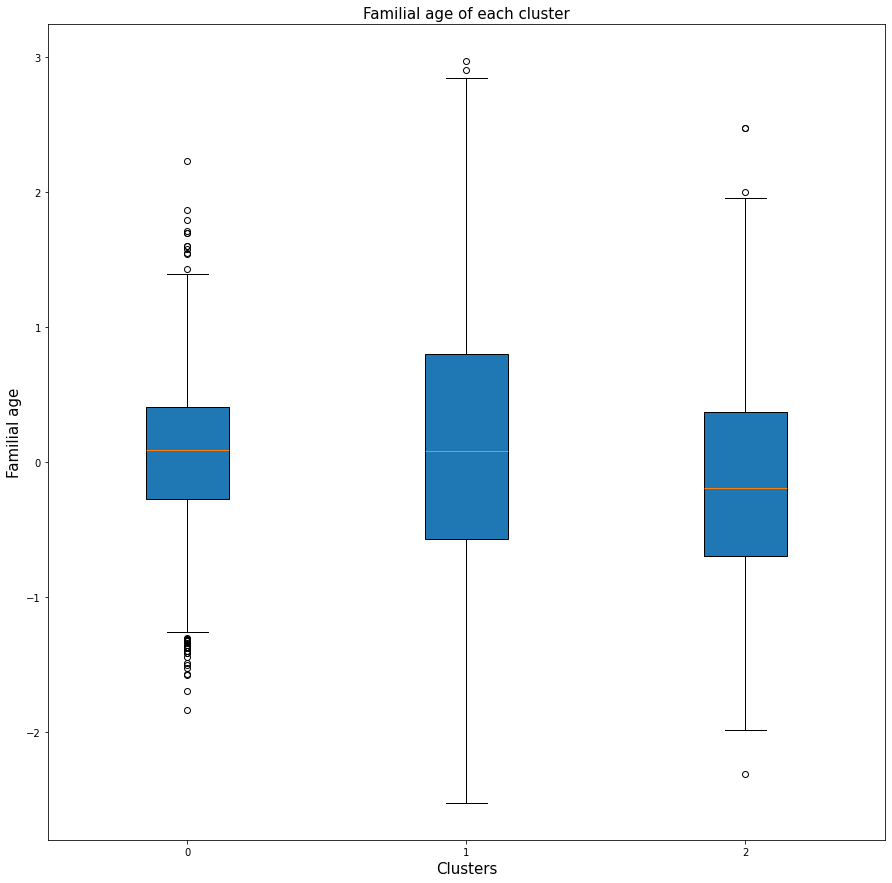

In [18]:
#Plot the clusters vs the principle components 

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,15))
temp1 = Clusterd_data.groupby(['Clusters'])['Familial age'].apply(list)
bplot = ax.boxplot(temp1, labels = temp1.index,
                     vert=True,
                     patch_artist=True)
ax.set_xlabel('Clusters', fontsize=15)
ax.set_ylabel('Familial age', fontsize=15)
ax.set_title('Familial age of each cluster', fontsize=15)


Text(0.5, 1.0, 'Percentage of education level of the clusters')

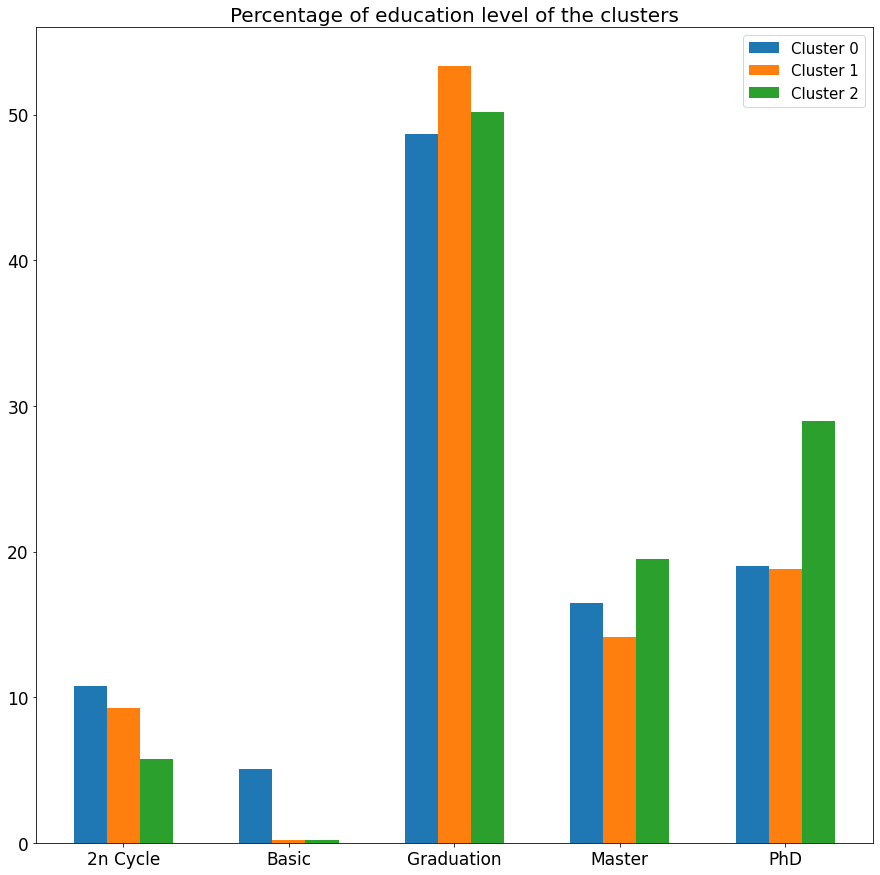

In [19]:
# Plot the clusters vs education
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,15))
x = np.arange(5)
xlabel = ['2n Cycle','Basic','Graduation','Master','PhD']
 
width = 0.2

clus0 = Clusterd_data.groupby('Education')['Clusters'].apply(lambda x: (x==0).sum()/1021*100).reset_index(name='count')
clus1 = Clusterd_data.groupby('Education')['Clusters'].apply(lambda x: (x==1).sum()/617*100).reset_index(name='count')
clus2 = Clusterd_data.groupby('Education')['Clusters'].apply(lambda x: (x==2).sum()/590*100).reset_index(name='count')
ax.bar(x - width, clus0['count'], width) 
ax.bar(x , clus1['count'],width) 
ax.bar(x + width, clus2['count'],width) 
plt.xticks(x, xlabel, fontsize=17) 
plt.yticks(fontsize=17)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], fontsize=15) 
plt.title('Percentage of education level of the clusters', fontsize=20)


Text(0.5, 1.0, 'Percentage of marital status of the clusters')

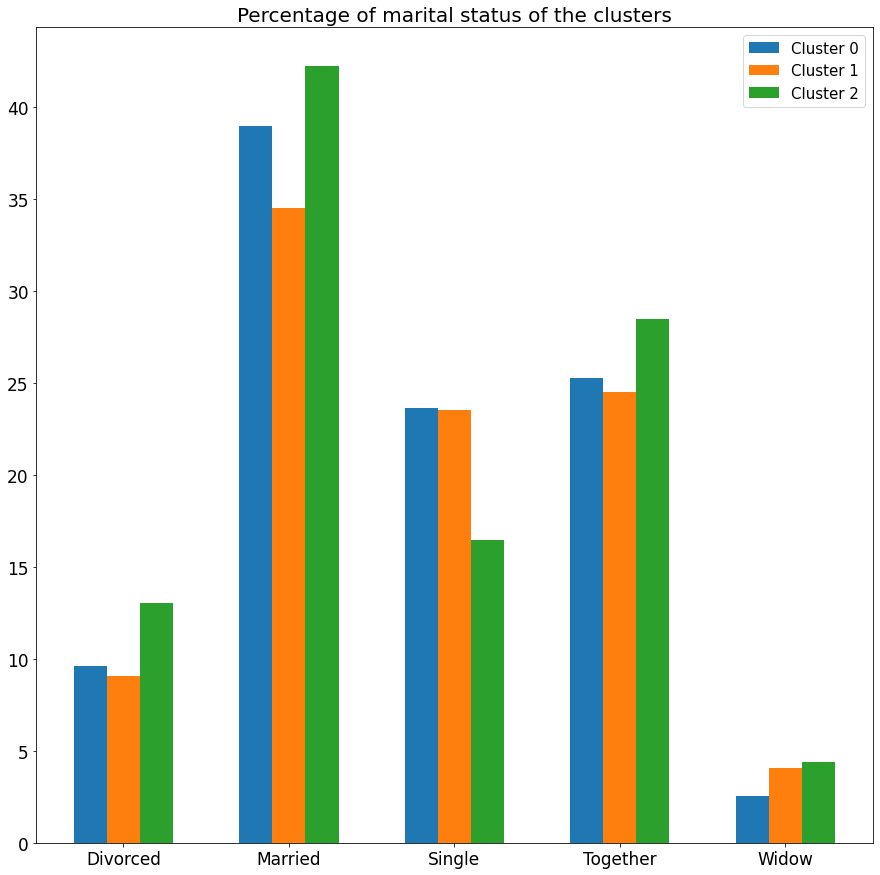

In [20]:
# Plot the clusters vs education
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,15))
x = np.arange(5)
xlabel = ['Divorced','Married','Single','Together','Widow']
 
width = 0.2

clus0 = Clusterd_data.groupby('Marital_Status')['Clusters'].apply(lambda x: (x==0).sum()/1021*100).reset_index(name='count')
clus1 = Clusterd_data.groupby('Marital_Status')['Clusters'].apply(lambda x: (x==1).sum()/617*100).reset_index(name='count')
clus2 = Clusterd_data.groupby('Marital_Status')['Clusters'].apply(lambda x: (x==2).sum()/590*100).reset_index(name='count')
ax.bar(x - width, clus0['count'], width) 
ax.bar(x , clus1['count'],width) 
ax.bar(x + width, clus2['count'],width) 
plt.xticks(x, xlabel, fontsize=17)
plt.yticks(fontsize=17)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], fontsize=15) 
plt.title('Percentage of marital status of the clusters', fontsize=20)



Text(0.5, 1.0, 'Response to last campaign percentage of the clusters')

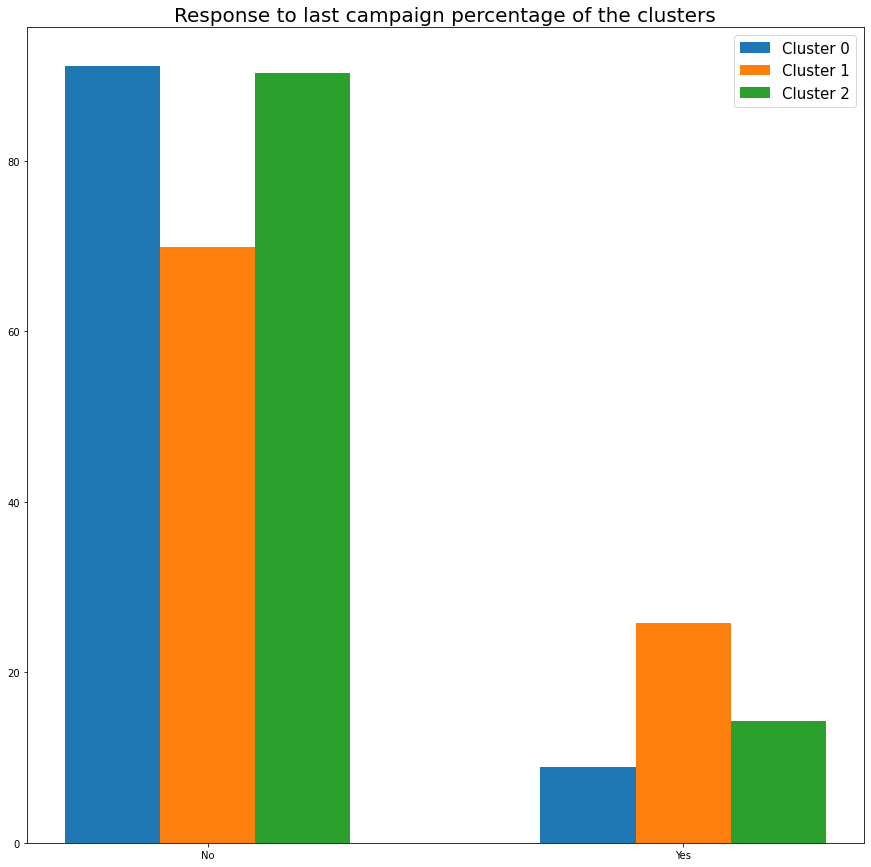

In [21]:
# Plot the clusters vs Response to last campaign
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,15))
x = np.arange(2)
xlabel = ['No','Yes']
 
width = 0.2

clus0 = Clusterd_data.groupby('Response')['Clusters'].apply(lambda x: (x==0).sum()/1021*100).reset_index(name='count')
clus1 = Clusterd_data.groupby('Response')['Clusters'].apply(lambda x: (x==1).sum()/617*100).reset_index(name='count')
clus2 = Clusterd_data.groupby('Response')['Clusters'].apply(lambda x: (x==2).sum()/590*100).reset_index(name='count')
ax.bar(x - width, clus0['count'], width) 
ax.bar(x , clus1['count'],width) 
ax.bar(x + width, clus2['count'],width) 
plt.xticks(x, xlabel) 
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], fontsize=15) 
plt.title('Response to last campaign percentage of the clusters', fontsize=20)


Text(0.5, 1.0, 'Complaint occured percentage in the clusters')

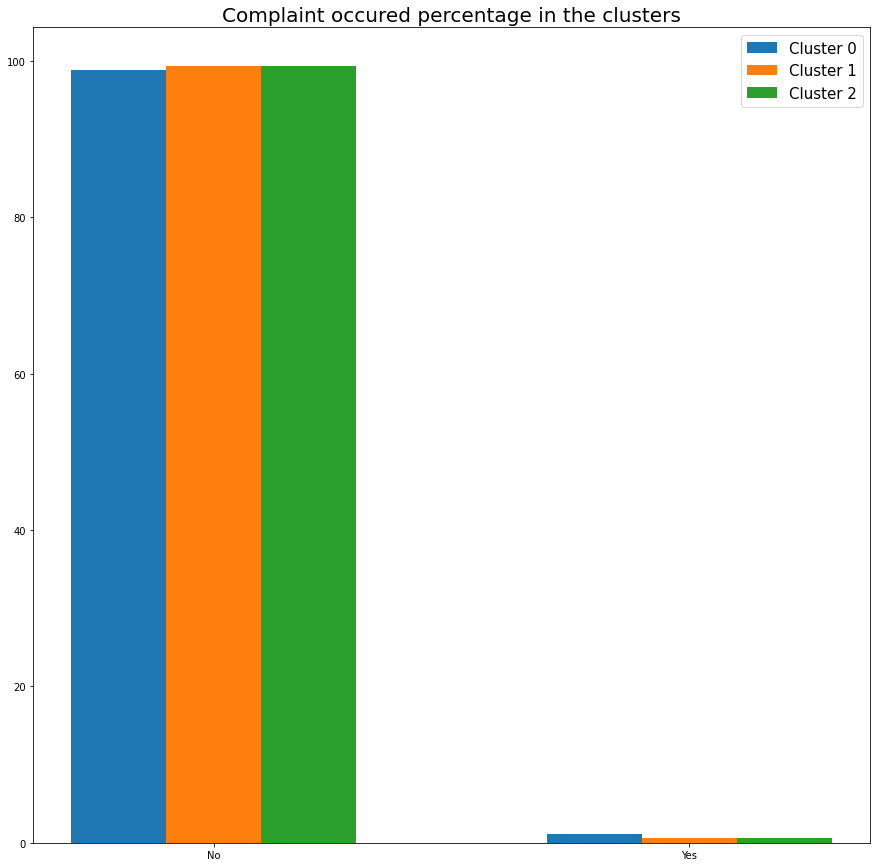

In [22]:
# Plot the clusters vs if complaint occured
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,15))
x = np.arange(2)
xlabel = ['No','Yes']
 
width = 0.2

clus0 = Clusterd_data.groupby('Complain')['Clusters'].apply(lambda x: (x==0).sum()/1021*100).reset_index(name='count')
clus1 = Clusterd_data.groupby('Complain')['Clusters'].apply(lambda x: (x==1).sum()/590*100).reset_index(name='count')
clus2 = Clusterd_data.groupby('Complain')['Clusters'].apply(lambda x: (x==2).sum()/617*100).reset_index(name='count')
ax.bar(x - width, clus0['count'], width) 
ax.bar(x , clus1['count'],width) 
ax.bar(x + width, clus2['count'],width) 
plt.xticks(x, xlabel) 
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], fontsize=15) 
plt.title('Complaint occured percentage in the clusters', fontsize=20)

Text(0.5, 1.0, 'Sepnding on gold of each cluster')

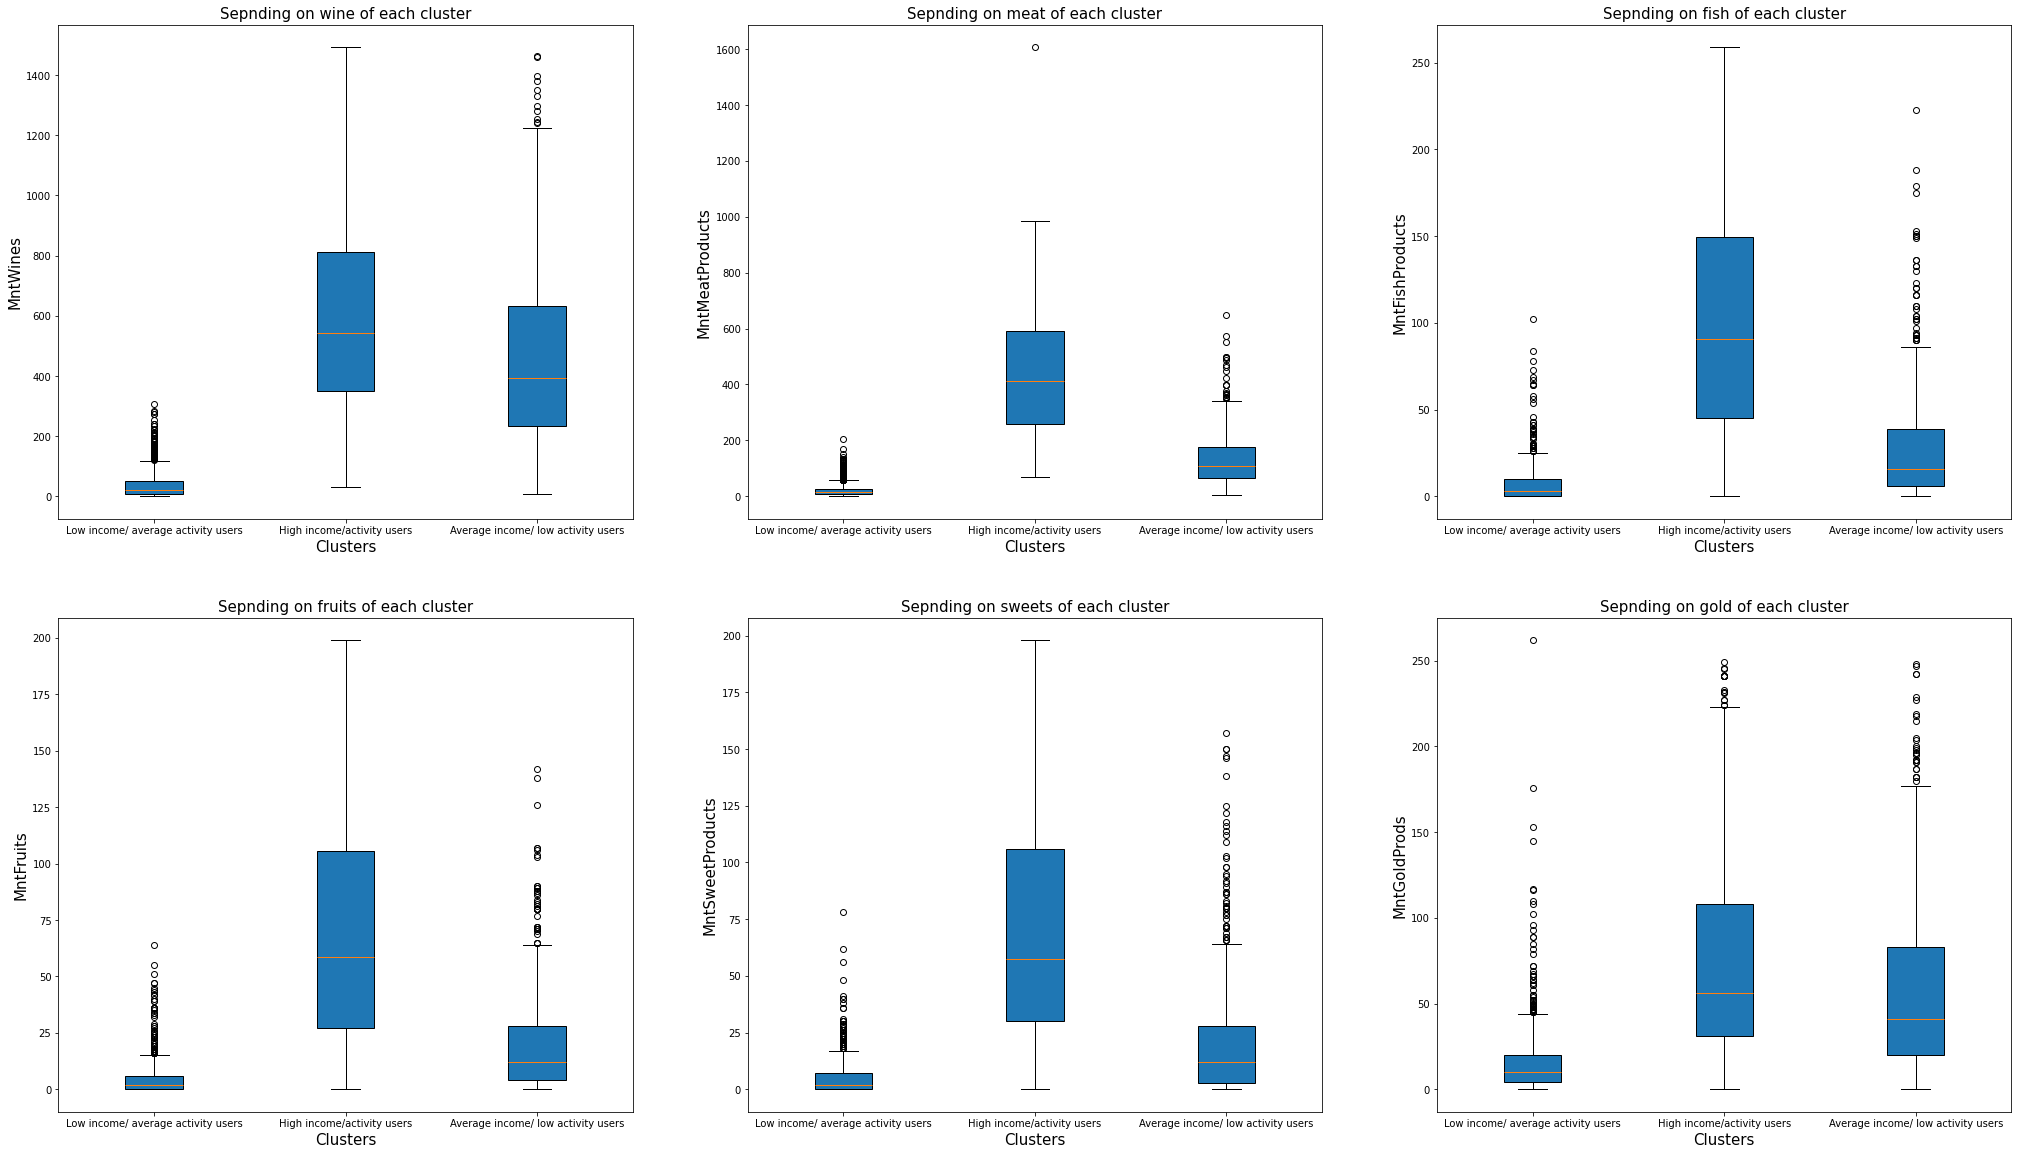

In [23]:
# Verify the clustering and PC analysis on the original data
# Amount of products bought

clusters_label = ['Low income/ average activity users','High income/activity users','Average income/ low activity users']
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (35,20))
temp1 = df_clus.groupby(['Clusters'])['MntWines'].apply(list)
bplot = axs[0,0].boxplot(temp1, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[0,0].set_xlabel('Clusters', fontsize=15)
axs[0,0].set_ylabel('MntWines', fontsize=15)
axs[0,0].set_title('Sepnding on wine of each cluster', fontsize=15)

temp2 = df_clus.groupby(['Clusters'])['MntFruits'].apply(list)
bplot = axs[1,0].boxplot(temp2, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[1,0].set_xlabel('Clusters', fontsize=15)
axs[1,0].set_ylabel('MntFruits', fontsize=15)
axs[1,0].set_title('Sepnding on fruits of each cluster', fontsize=15)

temp3 = df_clus.groupby(['Clusters'])['MntMeatProducts'].apply(list)
bplot = axs[0,1].boxplot(temp3, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[0,1].set_xlabel('Clusters', fontsize=15)
axs[0,1].set_ylabel('MntMeatProducts', fontsize=15)
axs[0,1].set_title('Sepnding on meat of each cluster', fontsize=15)

temp4 = df_clus.groupby(['Clusters'])['MntFishProducts'].apply(list)
bplot = axs[0,2].boxplot(temp4, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[0,2].set_xlabel('Clusters', fontsize=15)
axs[0,2].set_ylabel('MntFishProducts', fontsize=15)
axs[0,2].set_title('Sepnding on fish of each cluster', fontsize=15)

temp5 = df_clus.groupby(['Clusters'])['MntSweetProducts'].apply(list)
bplot = axs[1,1].boxplot(temp5, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[1,1].set_xlabel('Clusters', fontsize=15)
axs[1,1].set_ylabel('MntSweetProducts', fontsize=15)
axs[1,1].set_title('Sepnding on sweets of each cluster', fontsize=15)

temp6 = df_clus.groupby(['Clusters'])['MntGoldProds'].apply(list)
bplot = axs[1,2].boxplot(temp6, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[1,2].set_xlabel('Clusters', fontsize=15)
axs[1,2].set_ylabel('MntGoldProds', fontsize=15)
axs[1,2].set_title('Sepnding on gold of each cluster', fontsize=15)

In [24]:
df_clus.dtypes

Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3            object
AcceptedCmp4            object
AcceptedCmp5            object
AcceptedCmp1            object
AcceptedCmp2            object
Complain                object
Response                object
days_of_enrollment     float64
age                      int64
Clusters                uint16
dtype: object

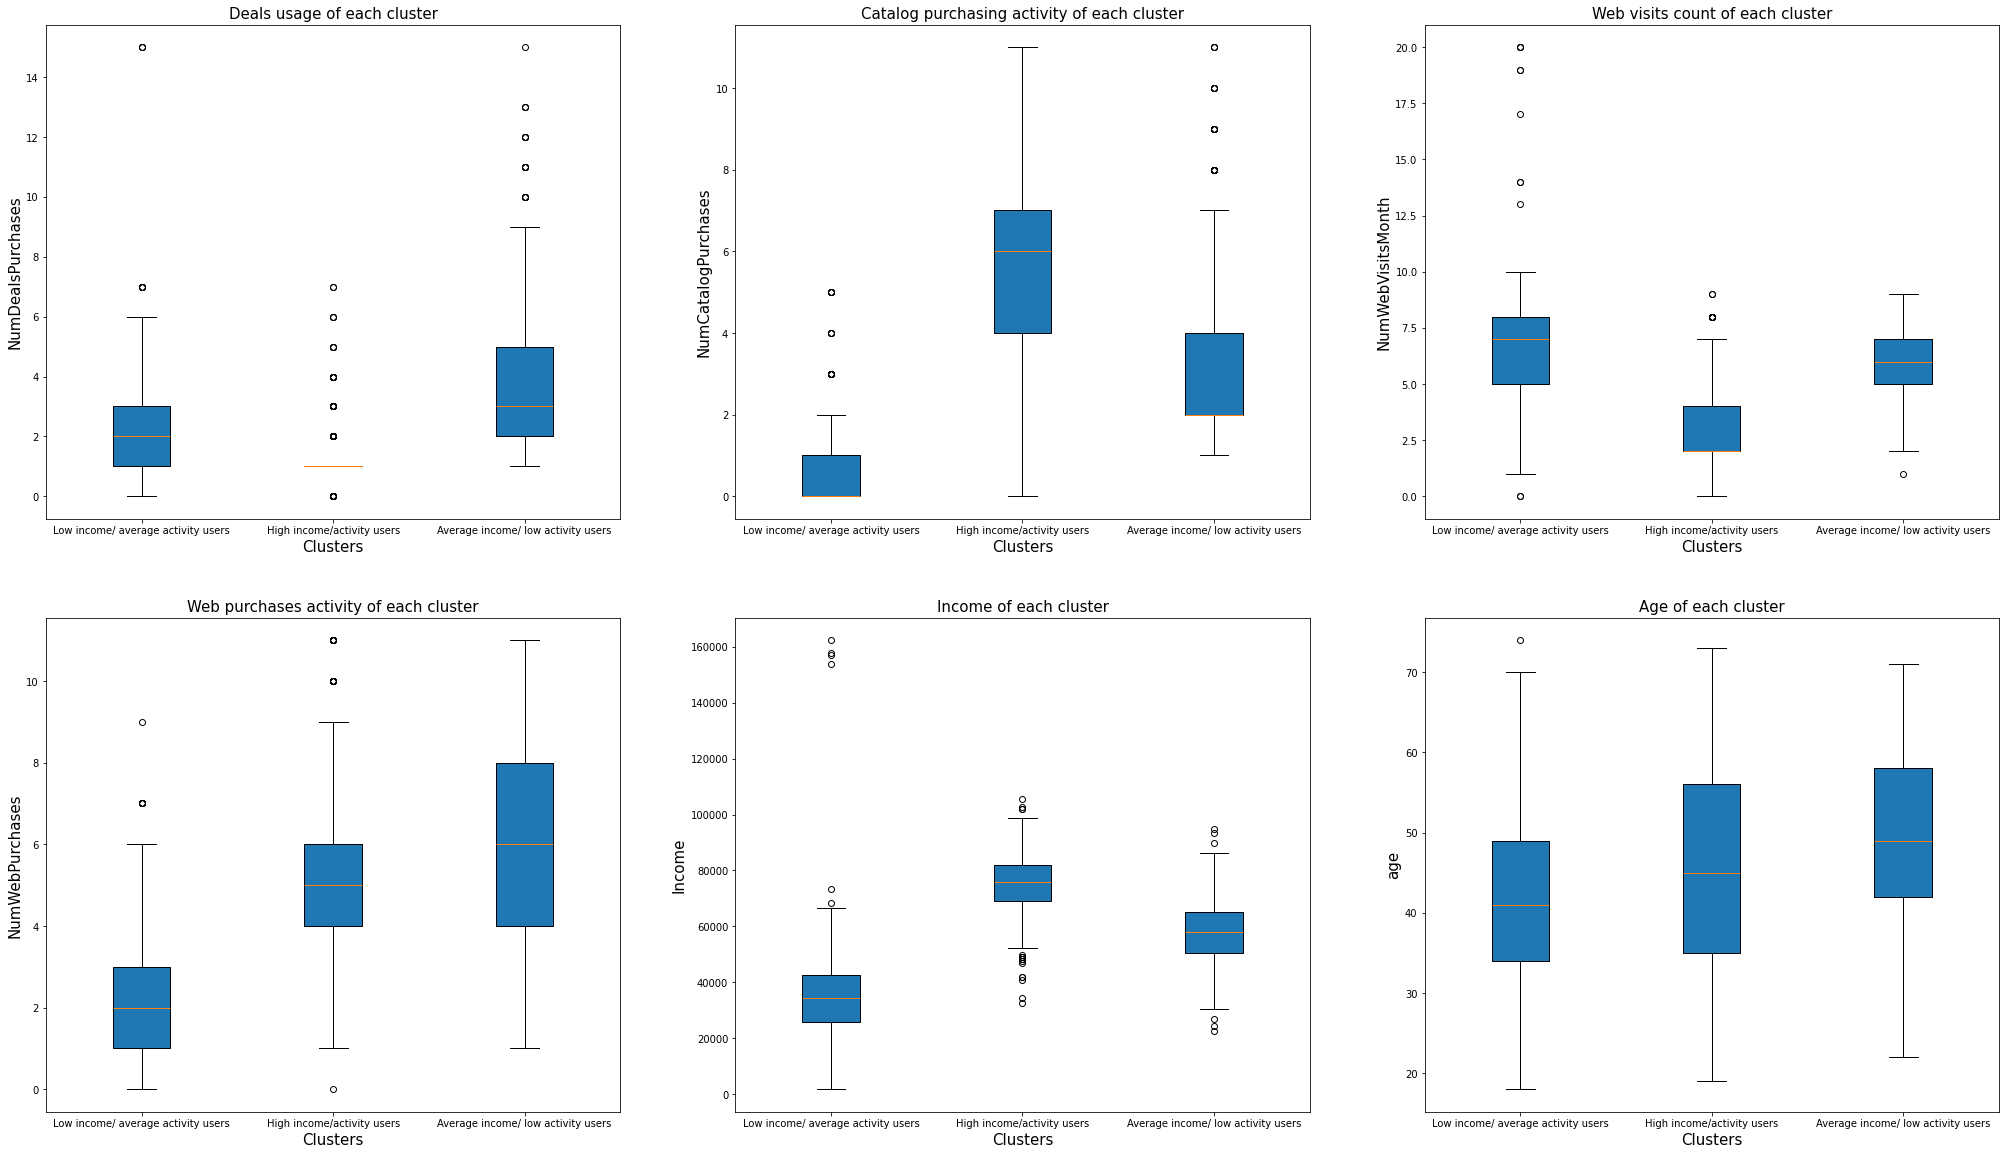

In [25]:
# Verify the clustering and PC analysis on the original data
# Purchasing habits

clusters_label = ['Low income/ average activity users','High income/activity users','Average income/ low activity users']
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (35,20))
temp1 = df_clus.groupby(['Clusters'])['NumDealsPurchases'].apply(list)
bplot = axs[0,0].boxplot(temp1, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[0,0].set_xlabel('Clusters', fontsize=15)
axs[0,0].set_ylabel('NumDealsPurchases', fontsize=15)
axs[0,0].set_title('Deals usage of each cluster', fontsize=15)

temp2 = df_clus.groupby(['Clusters'])['NumWebPurchases'].apply(list)
bplot = axs[1,0].boxplot(temp2, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[1,0].set_xlabel('Clusters', fontsize=15)
axs[1,0].set_ylabel('NumWebPurchases', fontsize=15)
axs[1,0].set_title('Web purchases activity of each cluster', fontsize=15)

temp3 = df_clus.groupby(['Clusters'])['NumCatalogPurchases'].apply(list)
bplot = axs[0,1].boxplot(temp3, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[0,1].set_xlabel('Clusters', fontsize=15)
axs[0,1].set_ylabel('NumCatalogPurchases', fontsize=15)
axs[0,1].set_title('Catalog purchasing activity of each cluster', fontsize=15)

temp4 = df_clus.groupby(['Clusters'])['NumWebVisitsMonth'].apply(list)
bplot = axs[0,2].boxplot(temp4, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[0,2].set_xlabel('Clusters', fontsize=15)
axs[0,2].set_ylabel('NumWebVisitsMonth', fontsize=15)
axs[0,2].set_title('Web visits count of each cluster', fontsize=15)

temp5 = df_clus.groupby(['Clusters'])['Income'].apply(list)
bplot = axs[1,1].boxplot(temp5, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[1,1].set_xlabel('Clusters', fontsize=15)
axs[1,1].set_ylabel('Income', fontsize=15)
axs[1,1].set_title('Income of each cluster', fontsize=15)

temp6 = df_clus.groupby(['Clusters'])['age'].apply(list)
bplot = axs[1,2].boxplot(temp6, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[1,2].set_xlabel('Clusters', fontsize=15)
axs[1,2].set_ylabel('age', fontsize=15)
axs[1,2].set_title('Age of each cluster', fontsize=15)
fig.savefig(r'C:\Users\iahma\OneDrive\Desktop\snips\15.PNG')

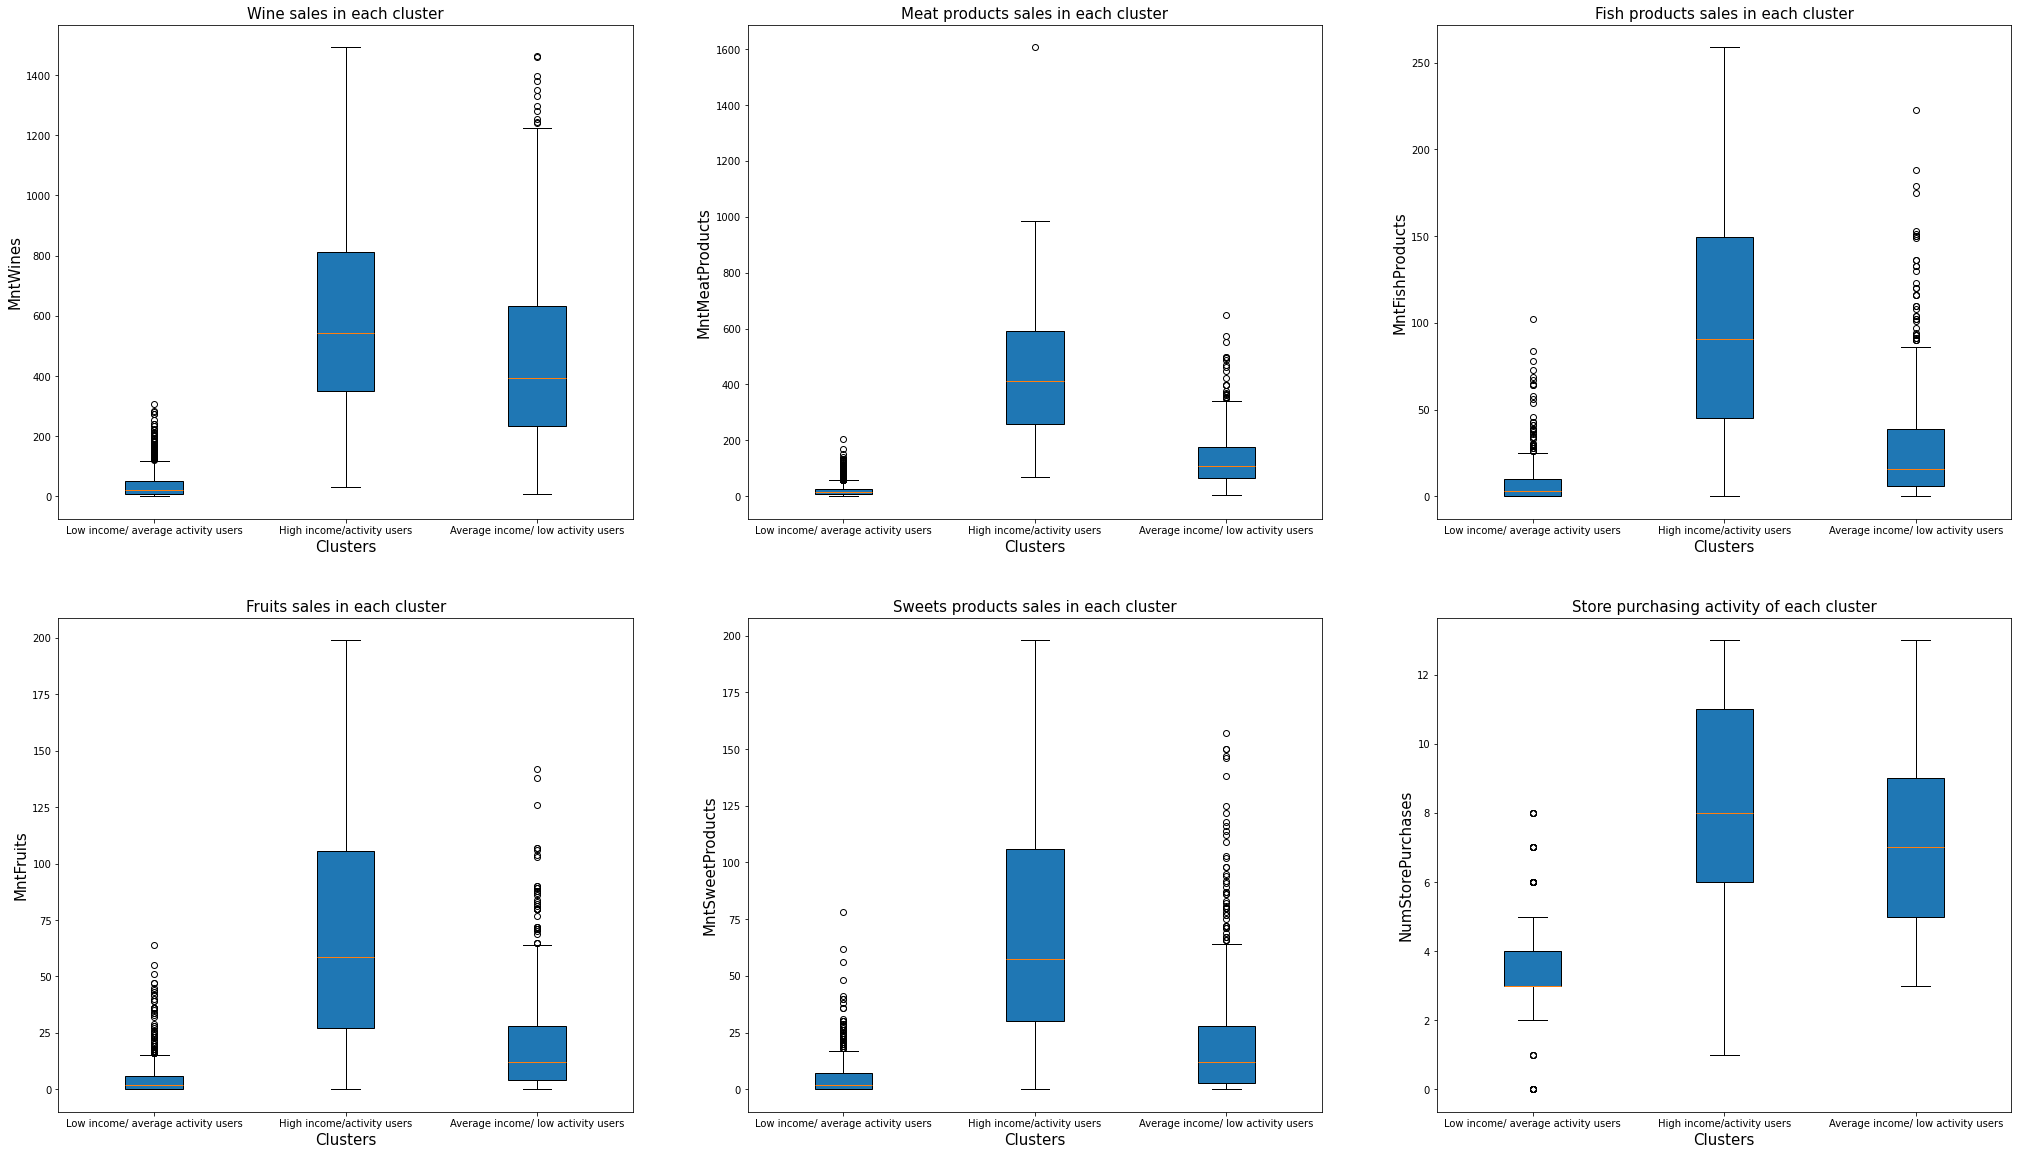

In [27]:
# Verify the clustering and PC analysis on the original data
# Purchasing habits continue

clusters_label = ['Low income/ average activity users','High income/activity users','Average income/ low activity users']
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (35,20))
temp1 = df_clus.groupby(['Clusters'])['MntWines'].apply(list)
bplot = axs[0,0].boxplot(temp1, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[0,0].set_xlabel('Clusters', fontsize=15)
axs[0,0].set_ylabel('MntWines', fontsize=15)
axs[0,0].set_title('Wine sales in each cluster', fontsize=15)

temp2 = df_clus.groupby(['Clusters'])['MntFruits'].apply(list)
bplot = axs[1,0].boxplot(temp2, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[1,0].set_xlabel('Clusters', fontsize=15)
axs[1,0].set_ylabel('MntFruits', fontsize=15)
axs[1,0].set_title('Fruits sales in each cluster', fontsize=15)

temp3 = df_clus.groupby(['Clusters'])['MntMeatProducts'].apply(list)
bplot = axs[0,1].boxplot(temp3, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[0,1].set_xlabel('Clusters', fontsize=15)
axs[0,1].set_ylabel('MntMeatProducts', fontsize=15)
axs[0,1].set_title('Meat products sales in each cluster', fontsize=15)

temp4 = df_clus.groupby(['Clusters'])['MntFishProducts'].apply(list)
bplot = axs[0,2].boxplot(temp4, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[0,2].set_xlabel('Clusters', fontsize=15)
axs[0,2].set_ylabel('MntFishProducts', fontsize=15)
axs[0,2].set_title('Fish products sales in each cluster', fontsize=15)

temp5 = df_clus.groupby(['Clusters'])['MntSweetProducts'].apply(list)
bplot = axs[1,1].boxplot(temp5, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[1,1].set_xlabel('Clusters', fontsize=15)
axs[1,1].set_ylabel('MntSweetProducts', fontsize=15)
axs[1,1].set_title('Sweets products sales in each cluster', fontsize=15)

temp6 = df_clus.groupby(['Clusters'])['NumStorePurchases'].apply(list)
bplot = axs[1,2].boxplot(temp6, labels = clusters_label,
                     vert=True,
                     patch_artist=True)
axs[1,2].set_xlabel('Clusters', fontsize=15)
axs[1,2].set_ylabel('NumStorePurchases', fontsize=15)
axs[1,2].set_title('Store purchasing activity of each cluster', fontsize=15)

fig.savefig(r'C:\Users\iahma\OneDrive\Desktop\snips\16.PNG')